In [1]:
import pandas as pd
from rdkit.Chem import QED
from rdkit.Chem import Crippen
from rdkit.Chem.Descriptors import ExactMolWt
from rdkit import Chem
from moses.metrics.utils import get_n_rings, get_mol
import sascorer
from moses.utils import get_mol
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmiles
from rdkit.Chem import Descriptors
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
la_ds = './dataset/smiles_LA.csv'
zinc_ds = './dataset/dataset_v1.csv'

la_df = pd.read_csv(la_ds,header=None)
zinc_df = pd.read_csv(zinc_ds,usecols=["SMILES"])
la_smiles = list(la_df[0])
zinc_smiles = random.sample(list(zinc_df["SMILES"]), 500)

In [3]:
qeds = [QED.qed(get_mol(s)) for s in la_smiles]
qeds_zinc = [QED.qed(get_mol(s)) for s in zinc_smiles]

molwts = [ExactMolWt(get_mol(s)) for s in la_smiles]
molwts_zinc = [ExactMolWt(get_mol(s)) for s in zinc_smiles]

logps = [Crippen.MolLogP(get_mol(s)) for s in la_smiles]
logps_zinc = [Crippen.MolLogP(get_mol(s)) for s in zinc_smiles]


tpsas = [Descriptors.TPSA(get_mol(s)) for s in la_smiles]
tpsas_zinc = [Descriptors.TPSA(get_mol(s)) for s in zinc_smiles]

RDKit WARNING: [16:50:55] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:50:55] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:50:55] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:50:55] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:50:55] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:50:55] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:50:56] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:50:56] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:50:56] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:50:56] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:50:56] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:50:56] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:50:57] WARNING: not r

/home/chenyang/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/chenyang/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


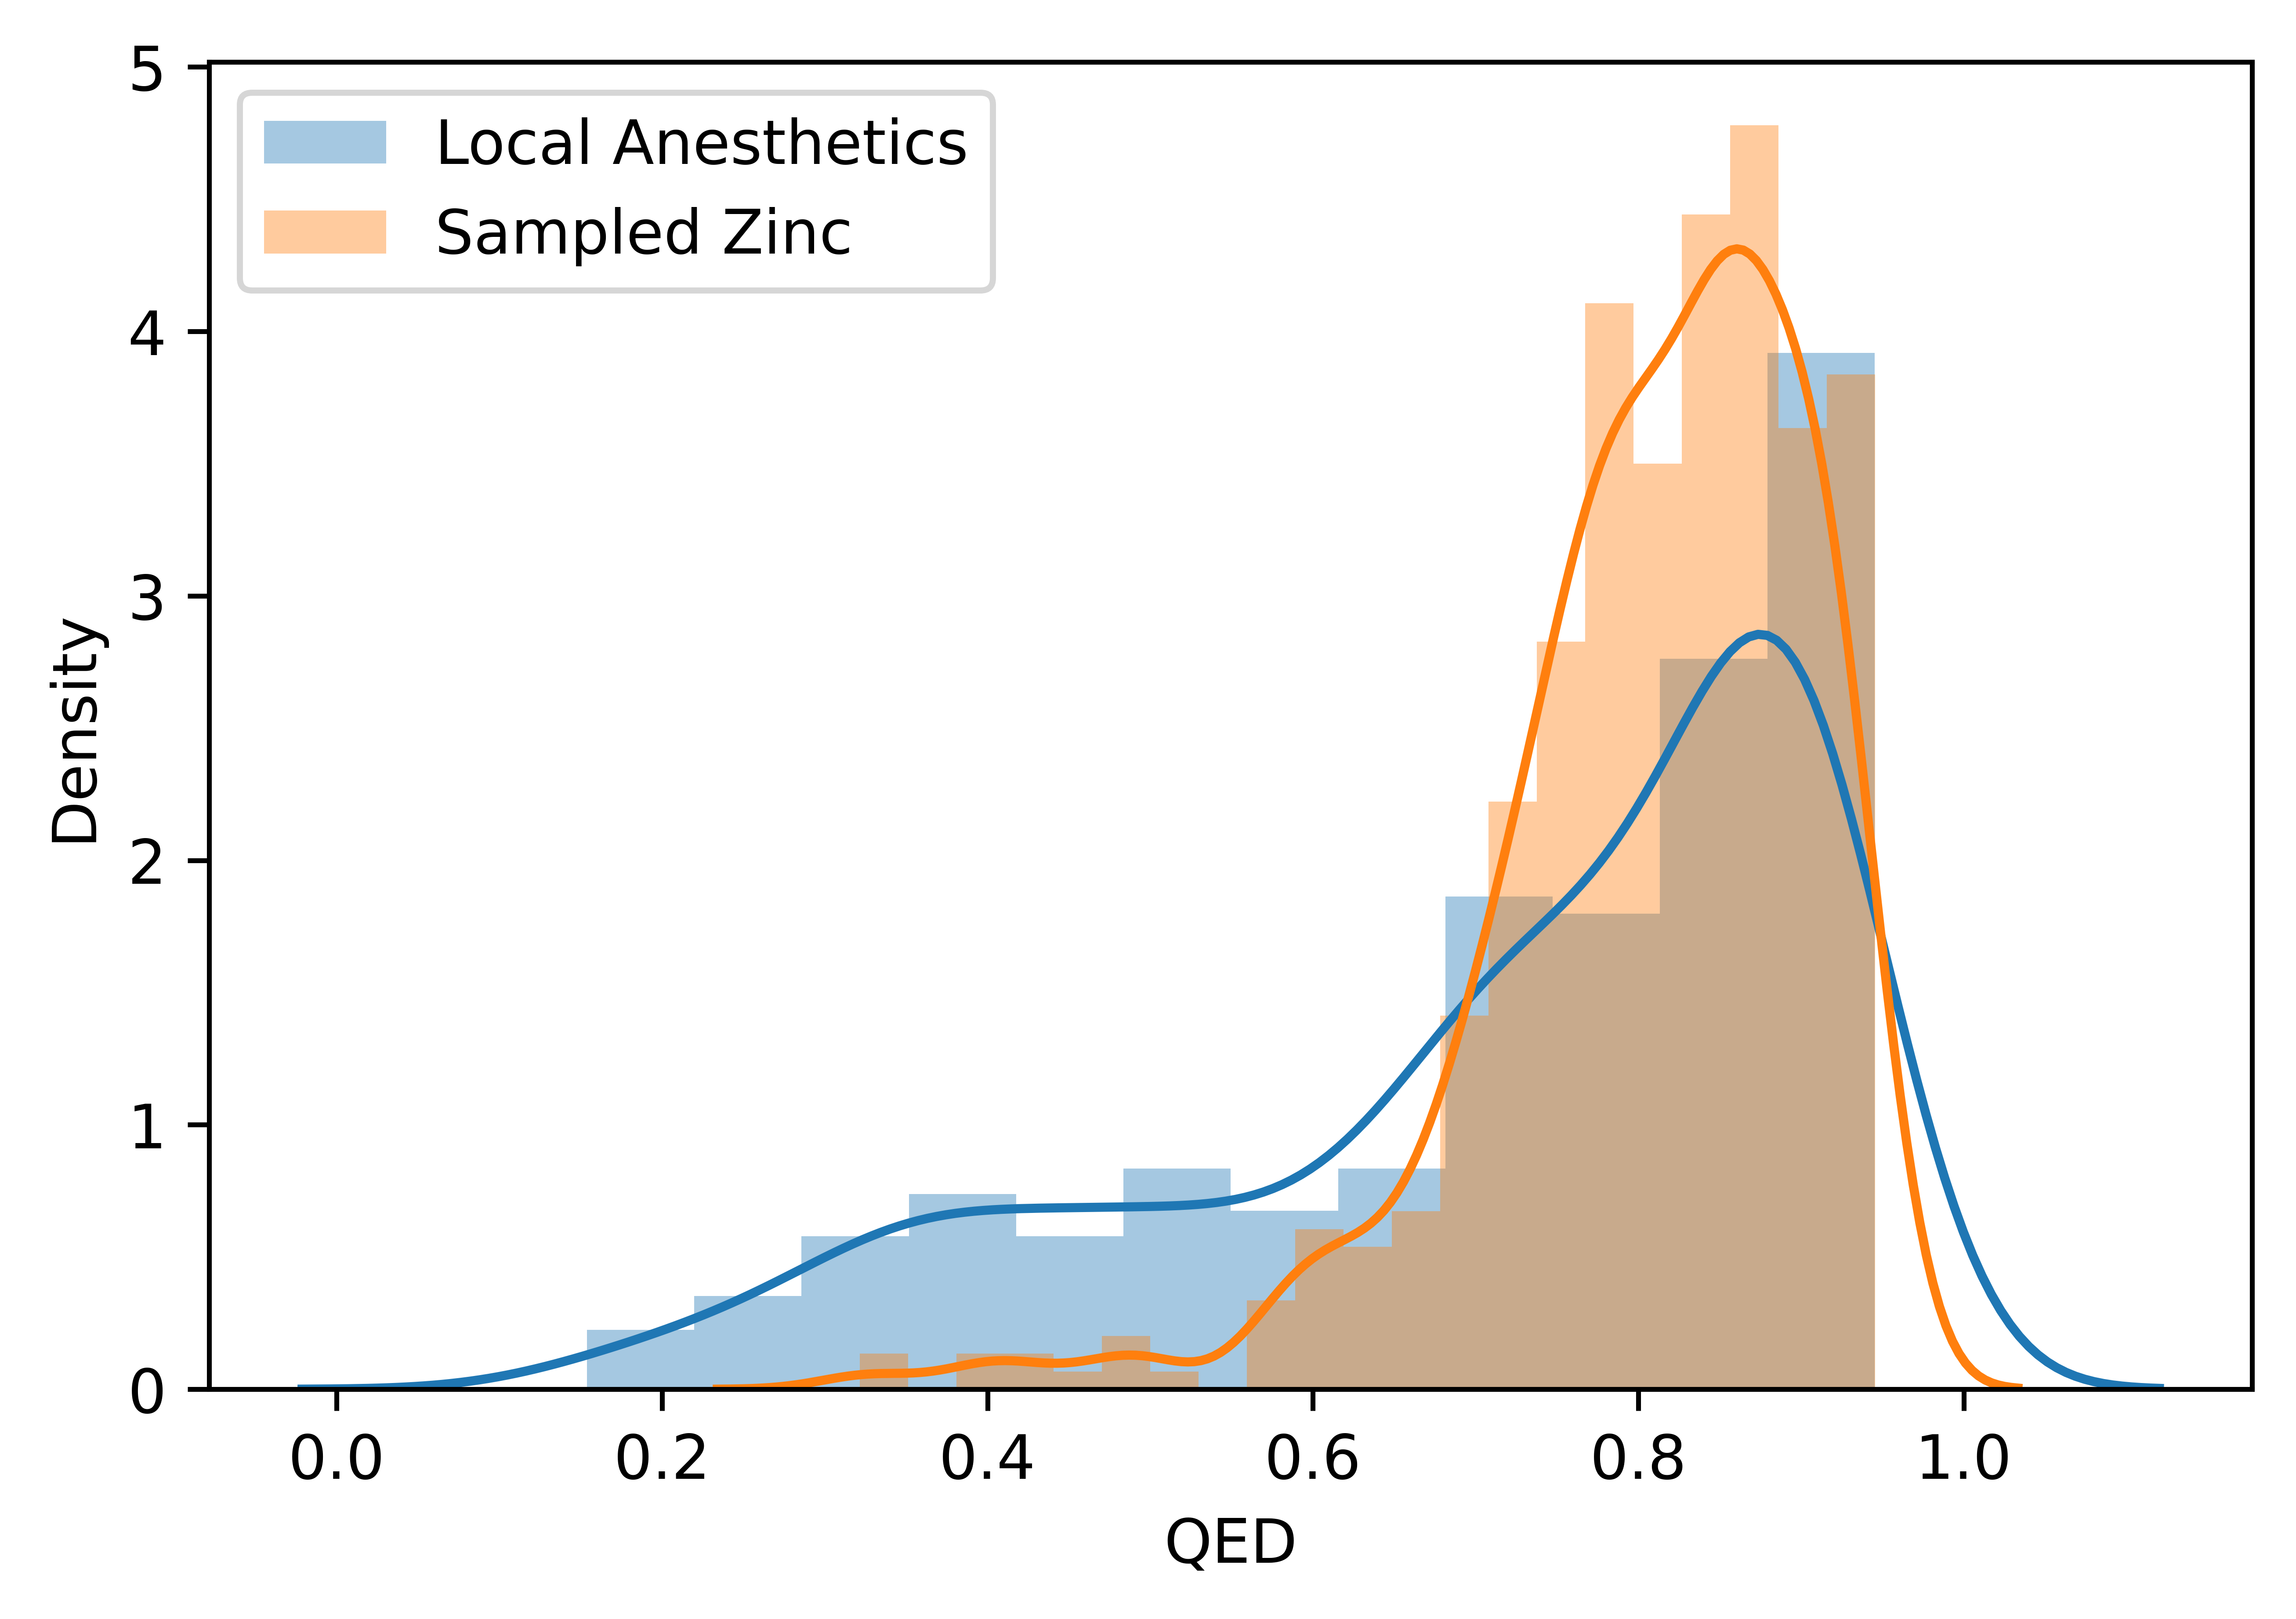

In [4]:
qeds_zinc = pd.Series(qeds_zinc, name = "QED")
plt.figure(dpi = 1000)
sns.distplot(qeds, kde = True, hist = True, label = "Local Anesthetics")
sns.distplot(qeds_zinc, kde = True, hist = True, label = "Sampled Zinc")
plt.legend()

/home/chenyang/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/chenyang/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


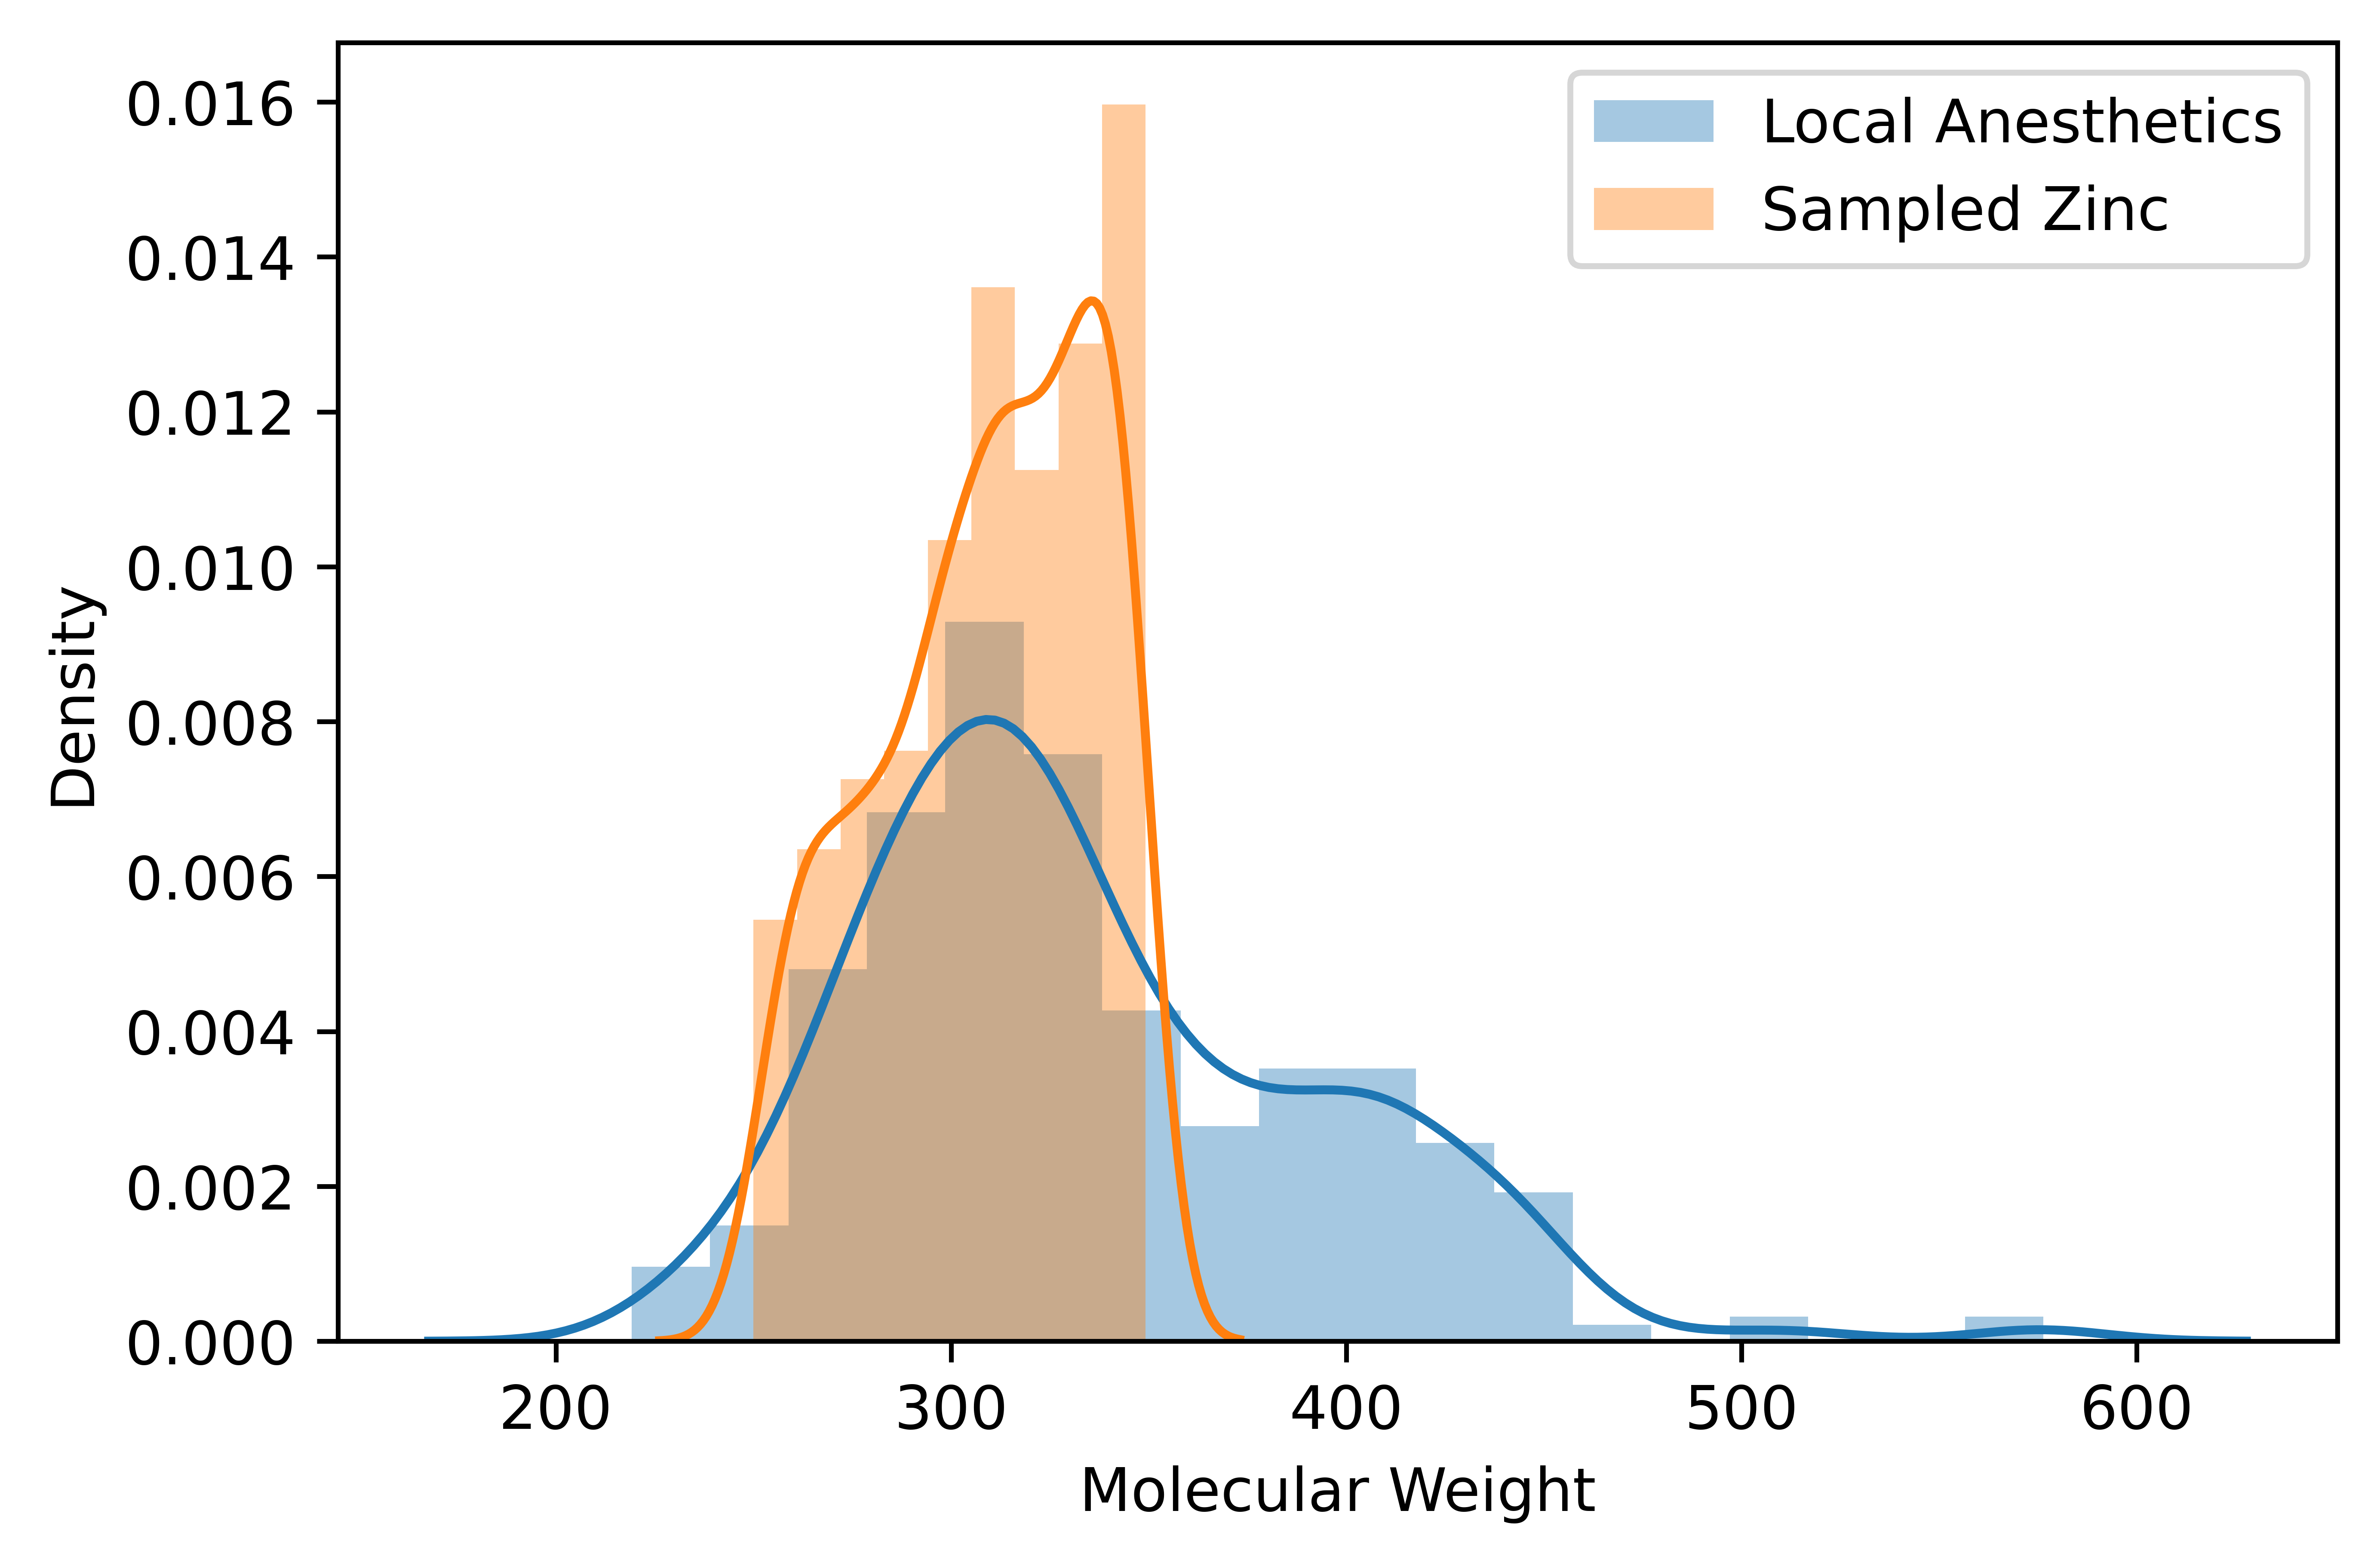

In [5]:
molwts_zinc = pd.Series(molwts_zinc, name = "Molecular Weight")
plt.figure(dpi = 1000)
sns.distplot(molwts, kde = True, hist = True, label = "Local Anesthetics")
sns.distplot(molwts_zinc, kde = True, hist = True, label = "Sampled Zinc")
plt.legend()

/home/chenyang/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/chenyang/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


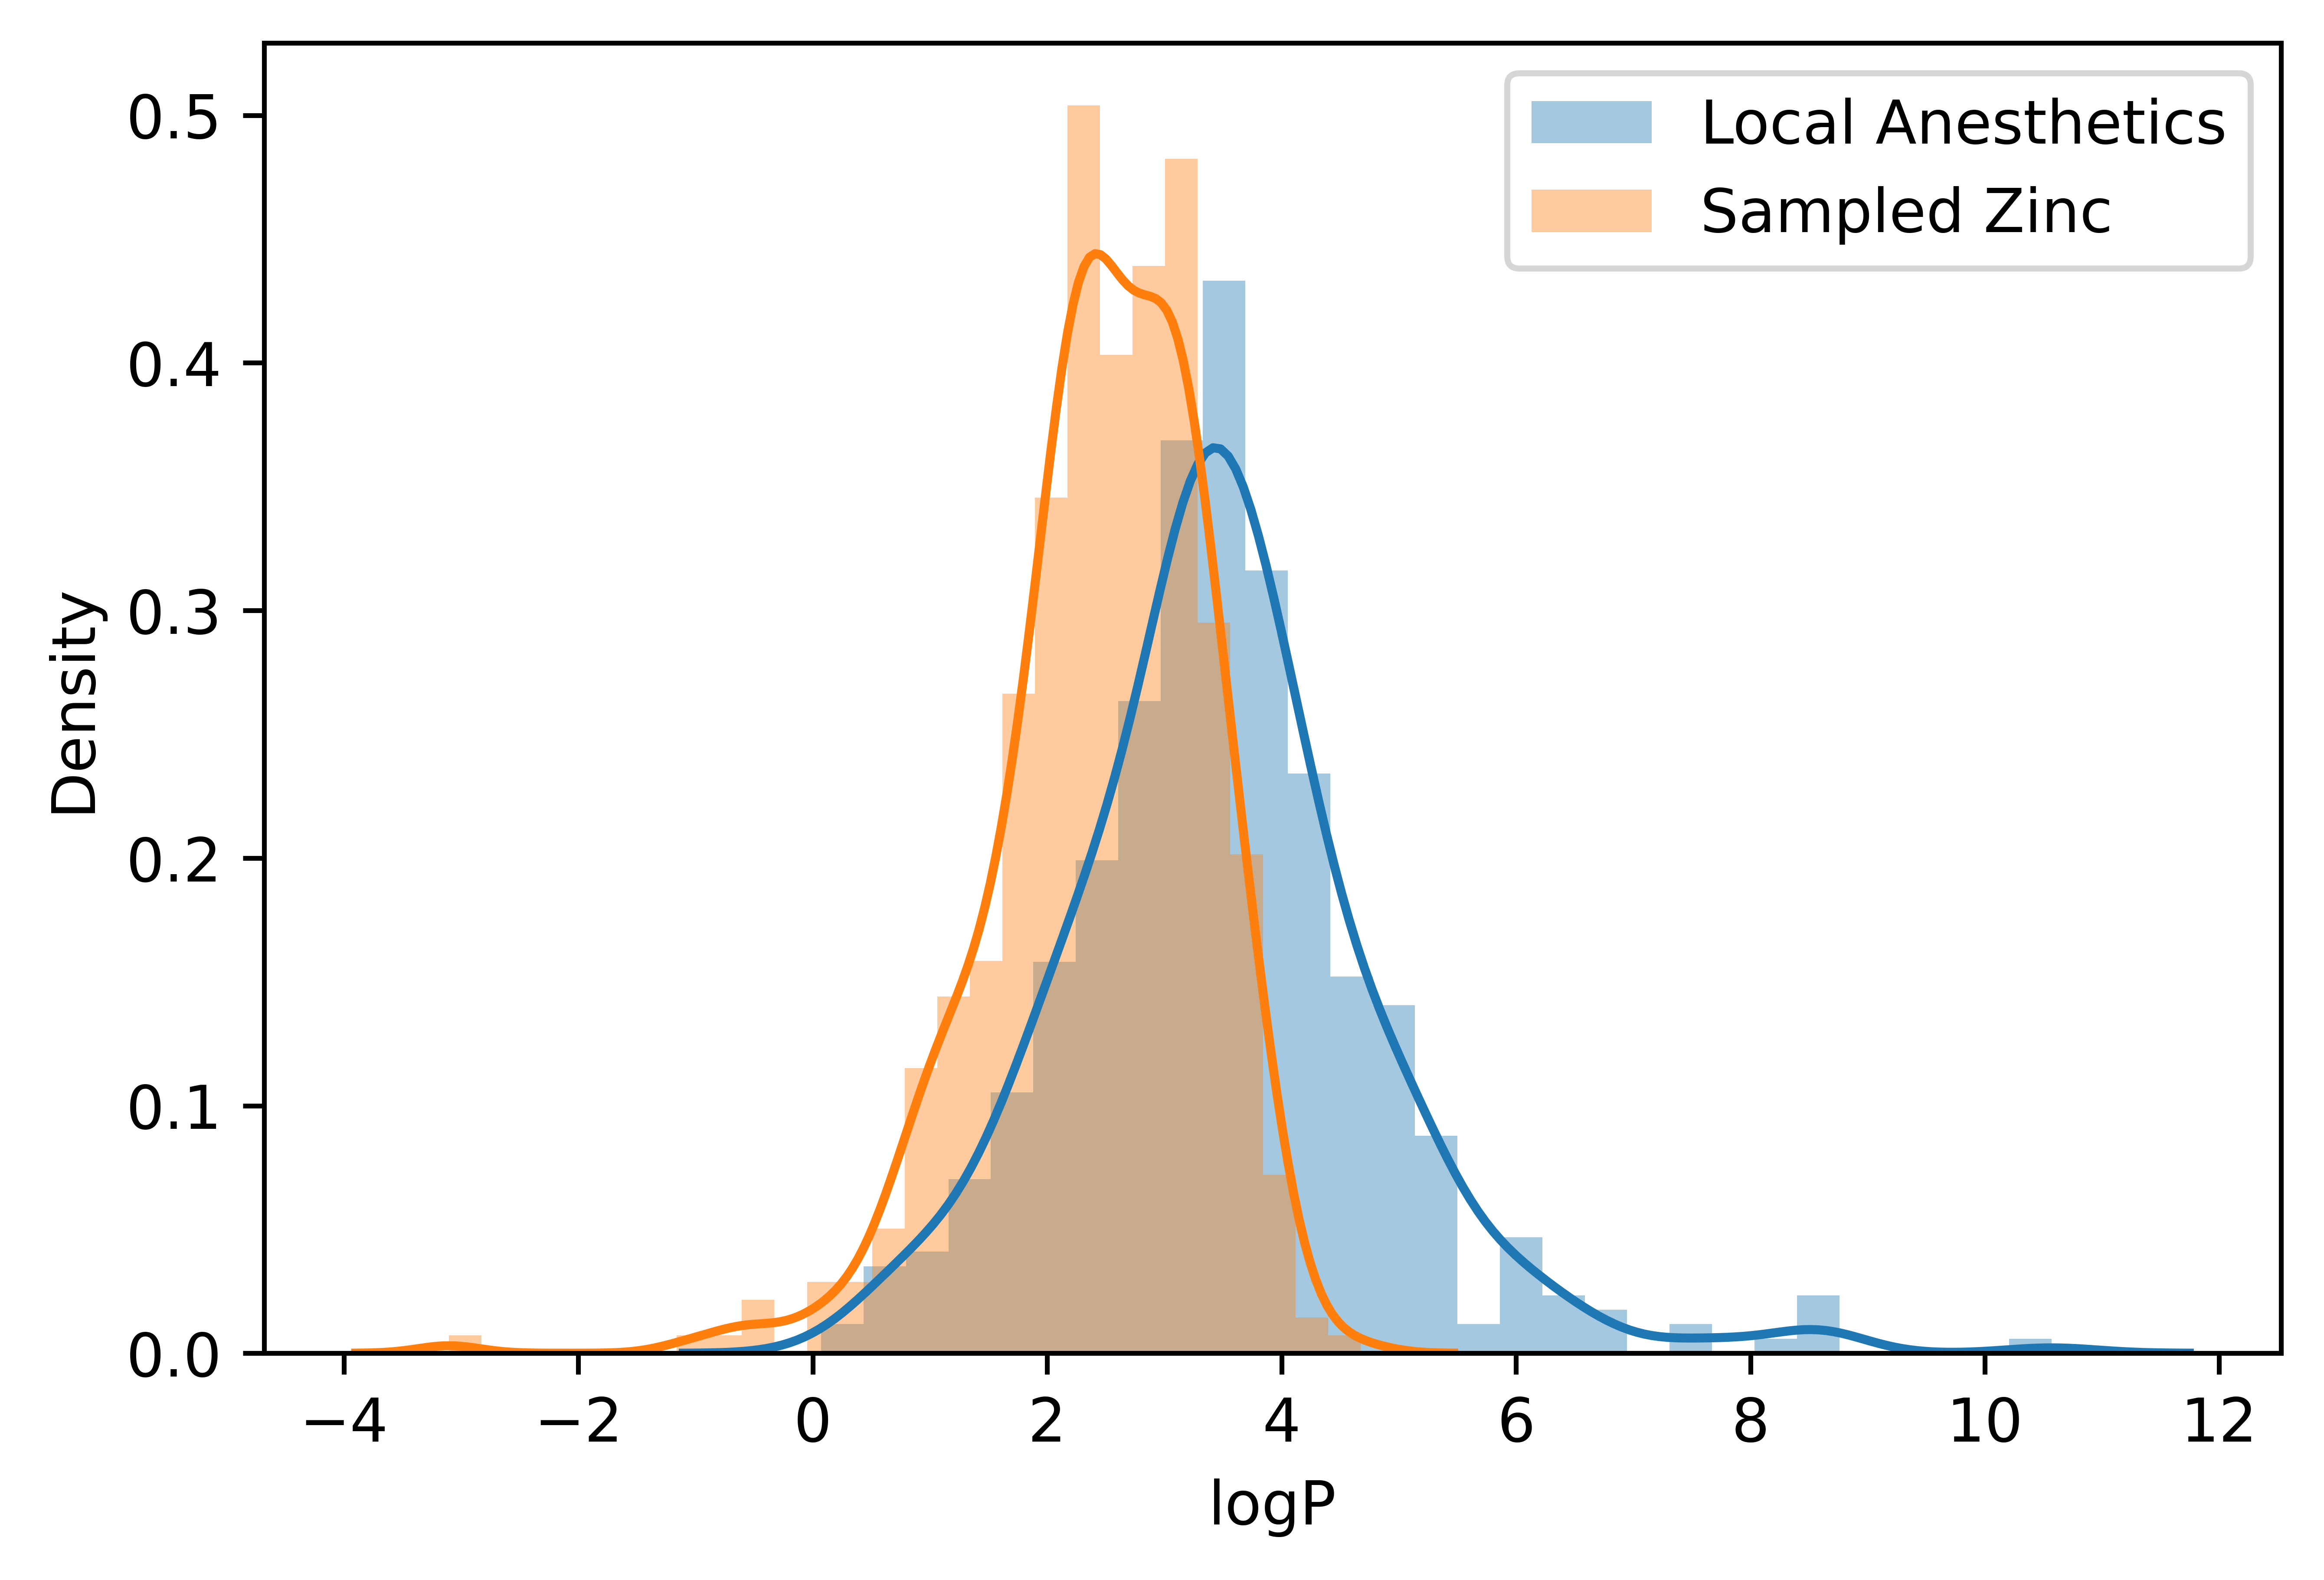

In [6]:
logps_zinc = pd.Series(logps_zinc, name = "logP")
plt.figure(dpi = 1000)
sns.distplot(logps, kde = True, hist = True, label = "Local Anesthetics")
sns.distplot(logps_zinc, kde = True, hist = True, label = "Sampled Zinc")
plt.legend()

/home/chenyang/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/chenyang/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


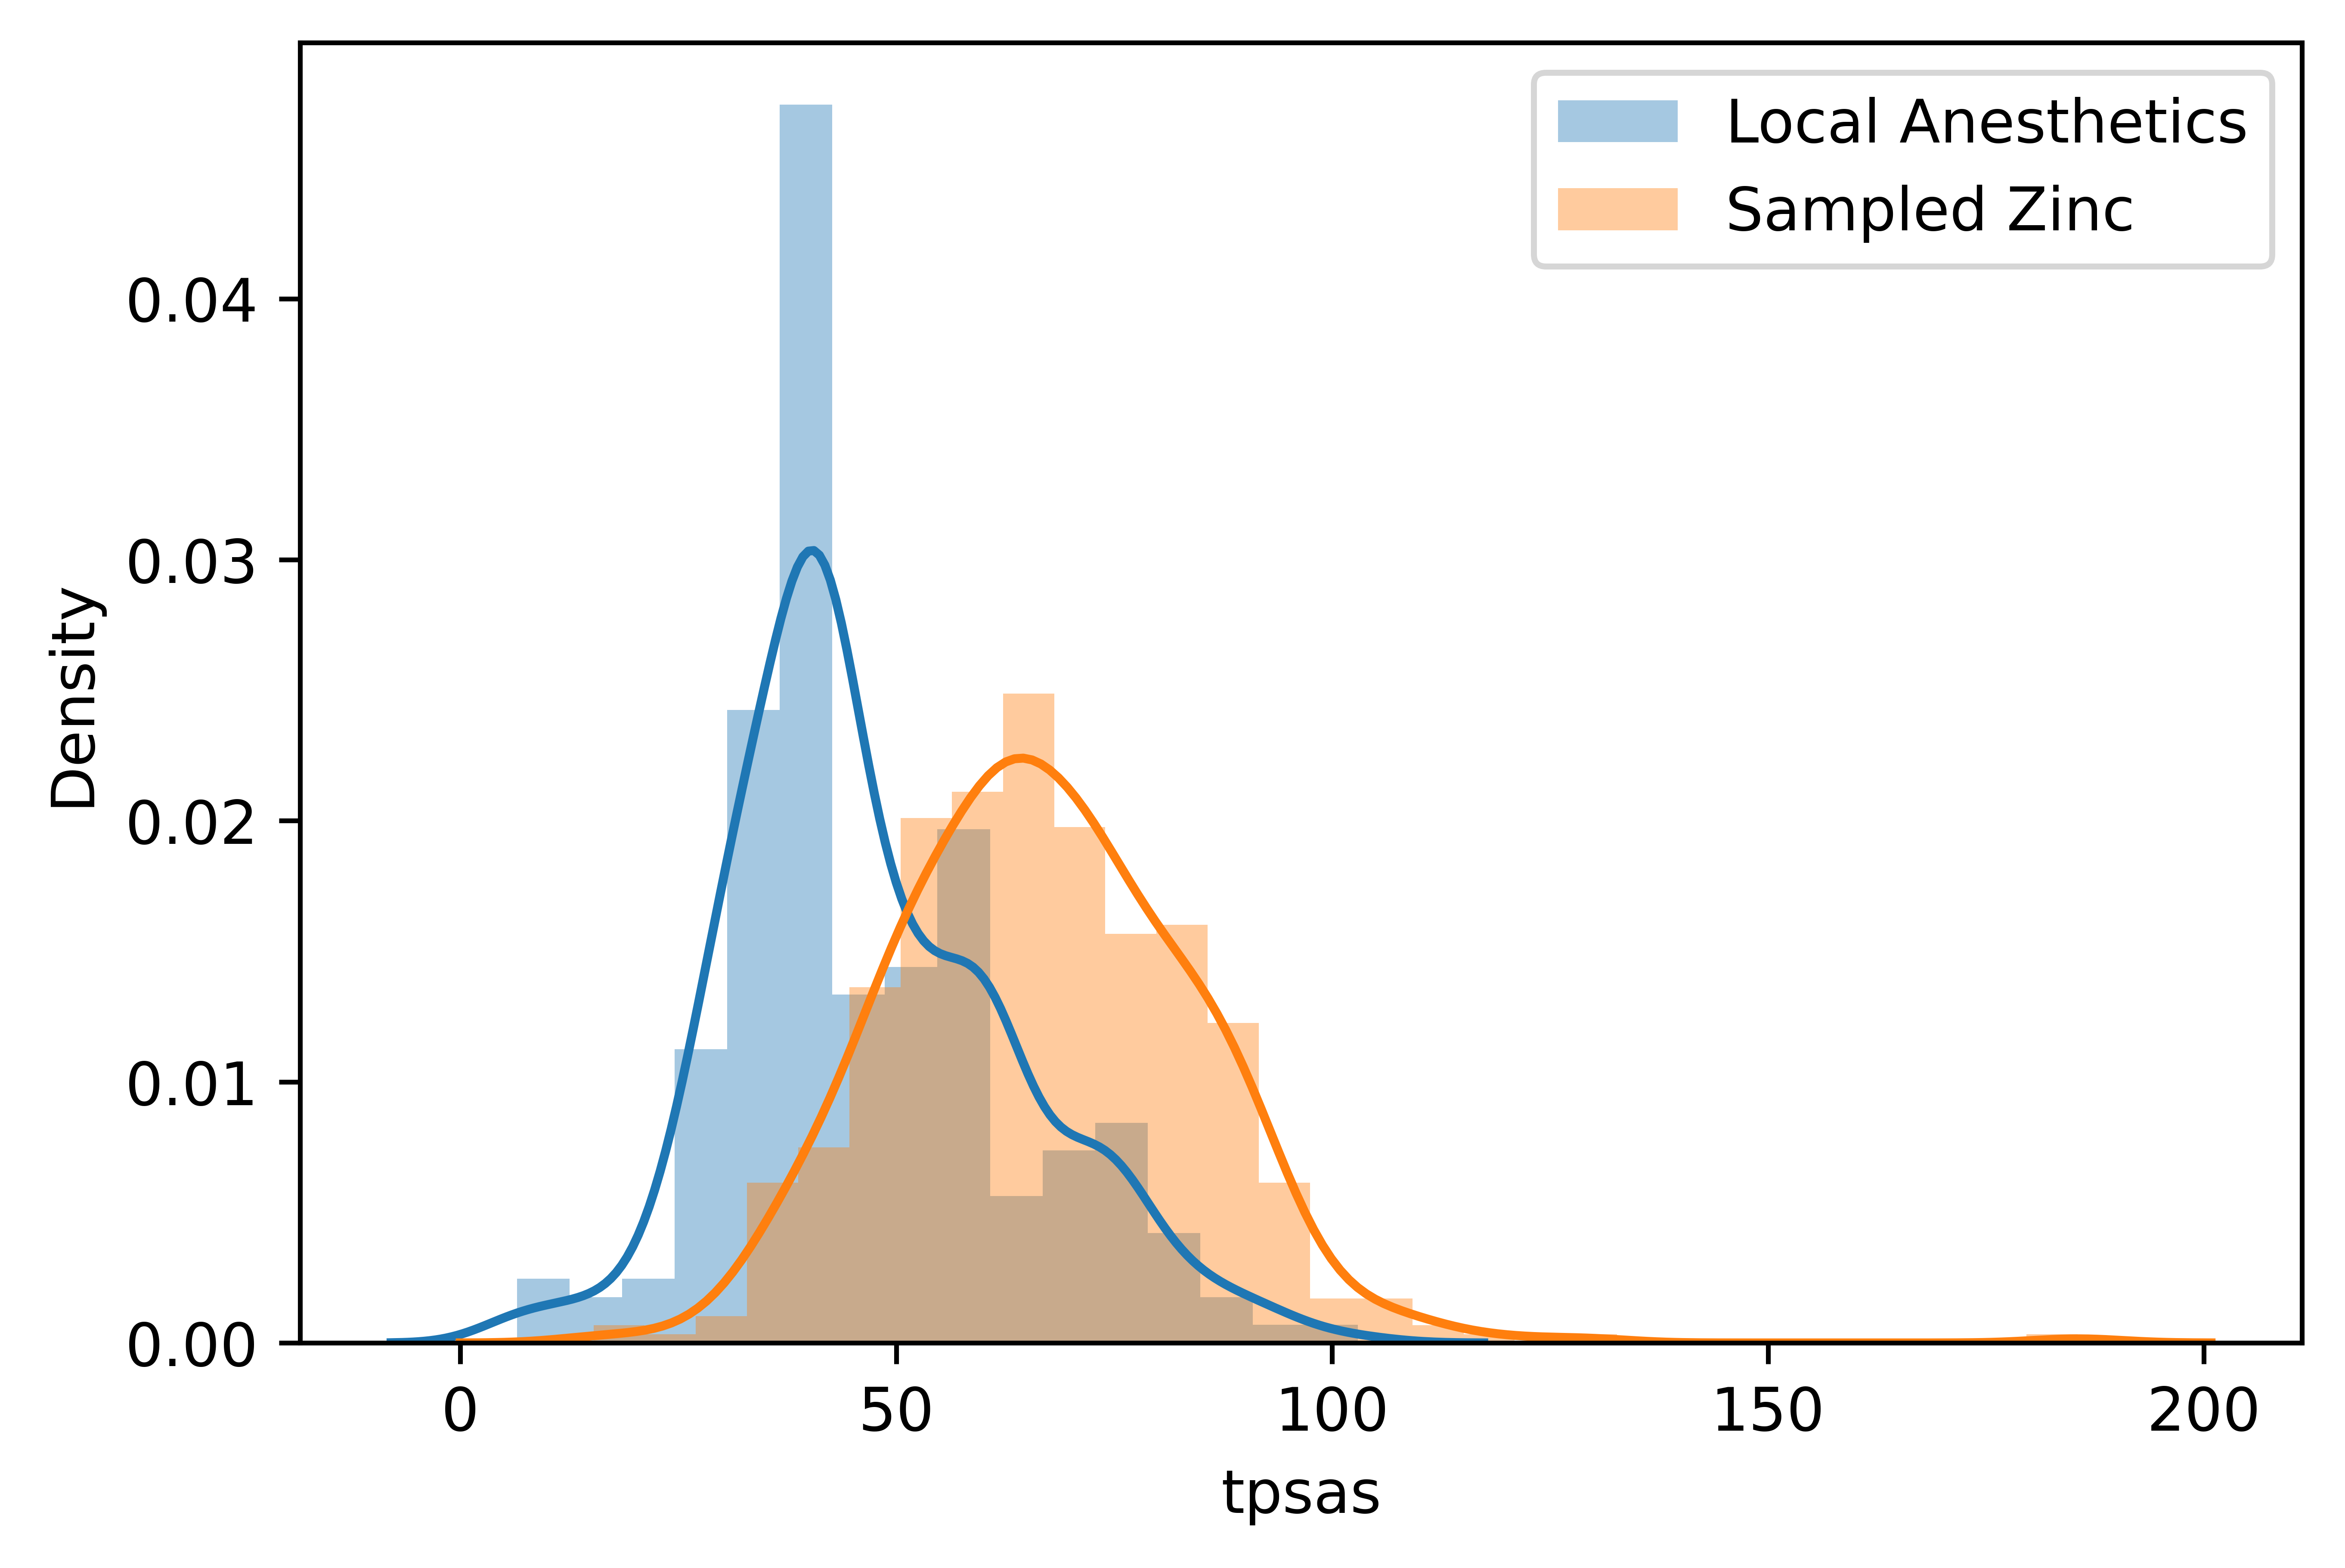

In [7]:
tpsas_zinc = pd.Series(tpsas_zinc, name = "tpsas")
plt.figure(dpi = 1000)
sns.distplot(tpsas, kde = True, hist = True, label = "Local Anesthetics")
sns.distplot(tpsas_zinc, kde = True, hist = True, label = "Sampled Zinc")
plt.legend()